In [30]:
import numpy as np
import matplotlib.pyplot as plt
from agent import KTDV
import pandas as pd
from environment import SimpleMDP
%matplotlib notebook

In [31]:
ag = KTDV(environment=SimpleMDP(nr_states=3))

all_results = {}
for ep in range(50):
    results = ag.train_one_episode()
    all_results[ep] = results



In [32]:
results = pd.DataFrame.from_dict({(trial, step): all_results[trial][step] 
                           for trial in all_results.keys() 
                           for step in all_results[trial].keys()},
                       orient='index')

In [33]:
results.index.names = ['trial', 't']

In [34]:
results.head()

weights  \
trial t                                                   
0     0                                 [0.0, 0.0, 0.0]   
      1   [0.1874980566121827, 0.4185332084821072, 0.0]   
1     0  [0.23798837263524036, 0.3956585475091167, 0.0]   
      1   [0.3408640147167864, 0.5698987663049543, 0.0]   
2     0   [0.3779748801545565, 0.5582324169261533, 0.0]   

                                                       cov  \
trial t                                                      
0     0  [[0.6467144073358045, 0.3224570333977758, 0.0]...   
      1  [[0.5912543402327919, 0.18749805661218272, 0.0...   
1     0  [[0.48215819562393925, 0.23918936757686185, 0....   
      1  [[0.44644154501669037, 0.17022767784259837, 0....   
2     0  [[0.38711054049664456, 0.19045108049750498, 0....   

                                                        K        dt    r  \
trial t                                                                    
0     0  [0.35650307727780634, -0.32085276955002573, 0.0]  0.000000  0.0   
      1     [0.1874980566121827, 0.4185332084821072, 0.0]  1.000000  1.0   
1     0   [0.2668877648047636, -0.12091362500009294, 0.0]  0.189182  0.0   
      1    [0.17022767784259835, 0.2883141940333243, 0.0]  0.604341  1.0   
2     0  [0.21570456804889013, -0.06780992099689817, 0.0]  0.172045  0.0   

         state      rhat         V  
trial t                             
0     0      0  0.000000  0.000000  
      1      1  0.000000  0.000000  
1     0      0 -0.189182  0.187498  
      1      1  0.395659  0.395659  
2     0      0 -0.172045  0.340864

<IPython.core.display.Javascript object>


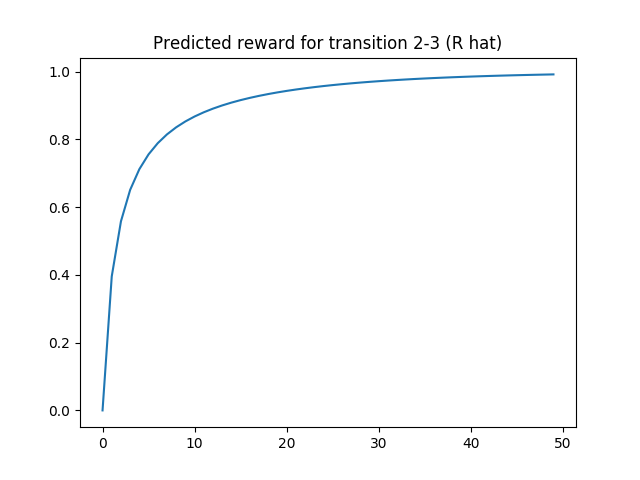

Text(0.5, 1.0, 'Predicted reward for transition 2-3 (R hat)')

In [39]:
plt.figure()
plt.plot(np.array(results.xs(1,level='t').rhat))
plt.title('Predicted reward for transition 2-3 (R hat)')

<IPython.core.display.Javascript object>


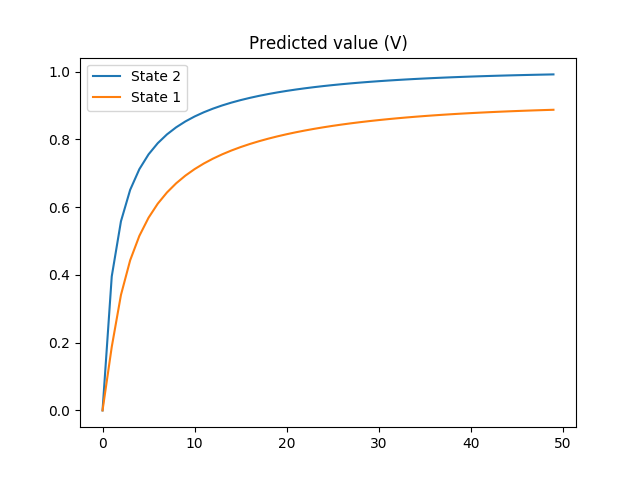

Text(0.5, 1.0, 'Predicted value (V)')

In [40]:
plt.figure()
plt.plot(np.array(results.xs(1,level='t').V))
plt.plot(np.array(results.xs(0,level='t').V))

plt.legend(['State 2', 'State 1'])

plt.title('Predicted value (V)')

<IPython.core.display.Javascript object>


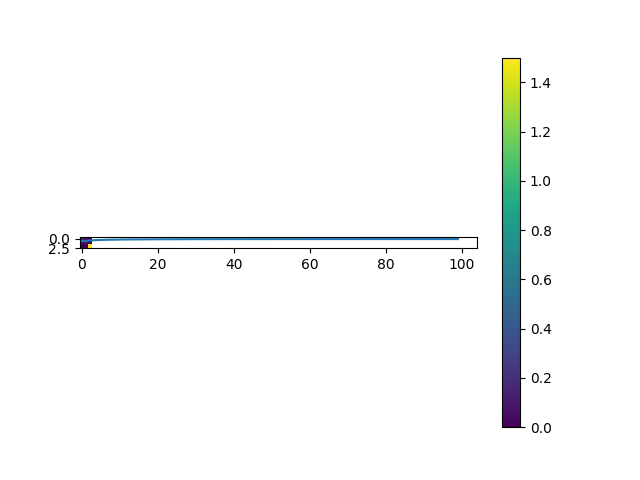

In [41]:
plt.figure()
plt.imshow(results.iloc[-1]['cov']);plt.colorbar()

In [37]:
results.iloc[-1]['weights']

array([0.88831003, 0.99266636, 0.        ])

In [42]:
results.iloc[-1].K

array([0.03935131, 0.08723604, 0.        ])

In [63]:
all_covs = np.stack(results['cov'].values)

<IPython.core.display.Javascript object>


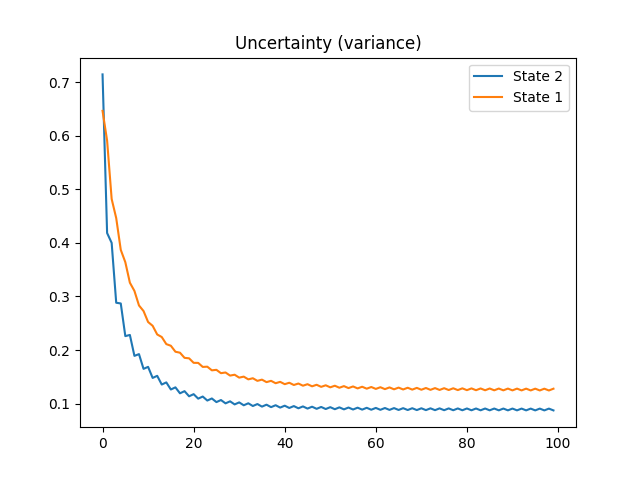

Text(0.5, 1.0, 'Uncertainty (variance)')

In [69]:
plt.figure()
plt.plot(all_covs[:, 1, 1])
plt.plot(all_covs[:, 0, 0])
plt.legend(['State 2', 'State 1'])

plt.title('Uncertainty (variance)')